## Step 1: Loading CSV Dataset

In [19]:
import pandas as pd
orders_df = pd.read_csv('Data/orders.csv')
orders_df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


## Step 2: Loading JSON Dataset

In [5]:
users_df = pd.read_json('Data/users.json')
users_df

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


## Step 3: Loading SQL Dataset

In [6]:
import sqlite3

In [7]:
connection = sqlite3.connect("restaurants.db") # Creating temporary database
cursor = connection.cursor()

In [9]:
with open("data/restaurants.sql", "r") as file:
          sql_commands=file.read()

In [10]:
cursor.executescript(sql_commands)

In [16]:
# Loading SQL Table into Pandas
restaurants_df=pd.read_sql_query(
    "SELECT * FROM restaurants",
    connection)

In [17]:
restaurants_df

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8
...,...,...,...,...
495,496,Restaurant_496,Indian,3.1
496,497,Restaurant_497,Mexican,4.4
497,498,Restaurant_498,Chinese,3.9
498,499,Restaurant_499,Mexican,4.9


In [18]:
connection.close()

## Step 4: Merging the Datasets

In [24]:
# Merging Orders and Users Datasets
order_users_df = pd.merge(orders_df,
                          users_df,
                          on="user_id",
                          how="left")

In [27]:
# Merging Restaurants dataset with merged order and users dataset
final_dataset = pd.merge(order_users_df,
                         restaurants_df,
                         on="restaurant_id",
                         how="left")

In [29]:
# Creating Final Dataset
print(final_dataset)

      order_id  user_id  restaurant_id  order_date  total_amount  \
0            1     2508            450  18-02-2023        842.97   
1            2     2693            309  18-01-2023        546.68   
2            3     2084            107  15-07-2023        163.93   
3            4      319            224  04-10-2023       1155.97   
4            5     1064            293  25-12-2023       1321.91   
...        ...      ...            ...         ...           ...   
9995      9996     2528            249  21-05-2023       1211.96   
9996      9997     2867            267  06-08-2023       1188.05   
9997      9998      522            420  11-11-2023        979.44   
9998      9999      319            492  08-09-2023       1105.93   
9999     10000      457            439  21-10-2023        879.58   

                   restaurant_name_x       name       city membership  \
0                  New Foods Chinese  User_2508  Hyderabad    Regular   
1     Ruchi Curry House Multicuisine 

In [32]:
# Final dataset file
Data = ("Data/final_food_delivery_dataset.csv")
final_dataset.to_csv(Data)

## Step 6: Data Analysis with Visualization

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Data/final_food_delivery_dataset.csv")
df.head()

df['order_date']=pd.to_datetime(df['order_date'])

C:\Users\gurur\AppData\Local\Temp\ipykernel_1484\2628497957.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date']=pd.to_datetime(df['order_date'])


### 1. Order Trends Over Time

Orders By Dates
order_date
2023-01-01    29
2023-01-02    19
2023-01-03    35
2023-01-04    26
2023-01-05    25
              ..
2023-12-28    31
2023-12-29    37
2023-12-30    26
2023-12-31    29
2024-01-01    27
Name: order_id, Length: 366, dtype: int64


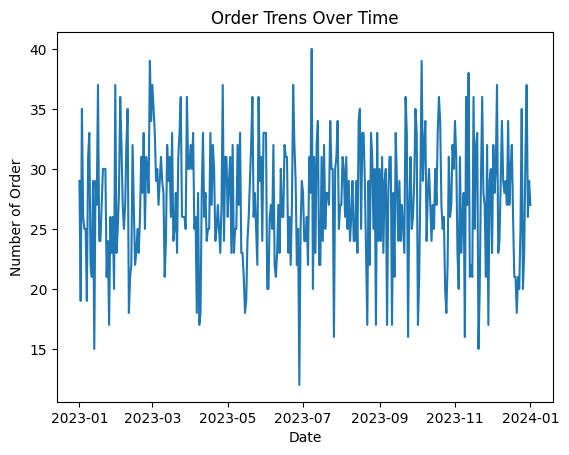

In [51]:
order_trends=df.groupby(df['order_date'].dt.date)['order_id'].count()
print("Orders By Dates")
print(order_trends)

plt.figure()
plt.plot(order_trends)
plt.xlabel("Date")
plt.ylabel("Number of Order")
plt.title("Order Trens Over Time")
plt.show()

### 2. User behavior patterns

Orders Per User
user_id
1        1
2       10
3        2
4        4
5        5
        ..
2996     3
2997     5
2998     6
2999     1
3000     2
Name: order_id, Length: 2883, dtype: int64


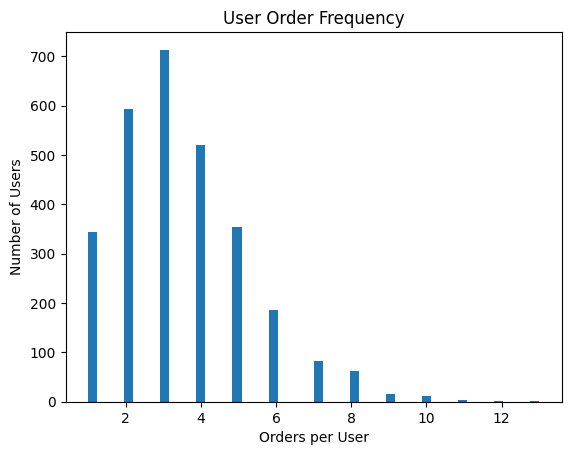

In [57]:
orders_by_user=df.groupby('user_id')['order_id'].count()
print("Orders Per User")
print(orders_by_user)

plt.figure()
plt.hist(orders_by_user, bins=50)
plt.xlabel("Orders per User")
plt.ylabel("Number of Users")
plt.title("User Order Frequency")
plt.show()

### 3. City-wise Revenue Performance

In [68]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Chennai', 'Bangalore'], dtype=object)

City-wise Revenue Performance
city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64


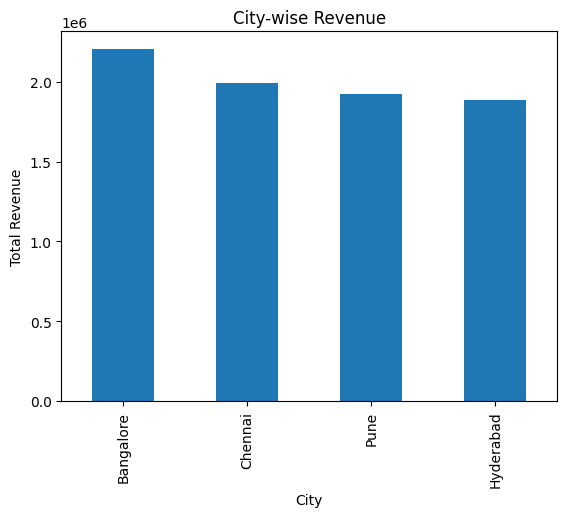

In [64]:
city_revenue = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
print("City-wise Revenue Performance")
print(city_revenue)

plt.figure()
city_revenue.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.title("City-wise Revenue")
plt.show()

### 4. Cuisine-wise Performance

In [66]:
df['cuisine'].unique()

array(['Mexican', 'Indian', 'Chinese', 'Italian'], dtype=object)

Cuisine wise Revenue
cuisine
Chinese    1930504.65
Indian     1971412.58
Italian    2024203.80
Mexican    2085503.09
Name: total_amount, dtype: float64


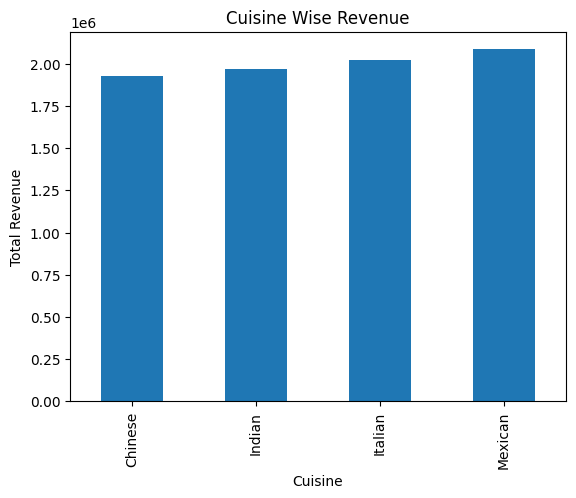

In [72]:
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum()
print("Cuisine wise Revenue")
print(cuisine_revenue)

plt.figure()
cuisine_revenue.plot(kind='bar')
plt.xlabel("Cuisine")
plt.ylabel("Total Revenue")
plt.title("Cuisine Wise Revenue")
plt.show()

### 5. Membership Impact (Gold vs Regular)

Membership Impact On Revenue
membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64


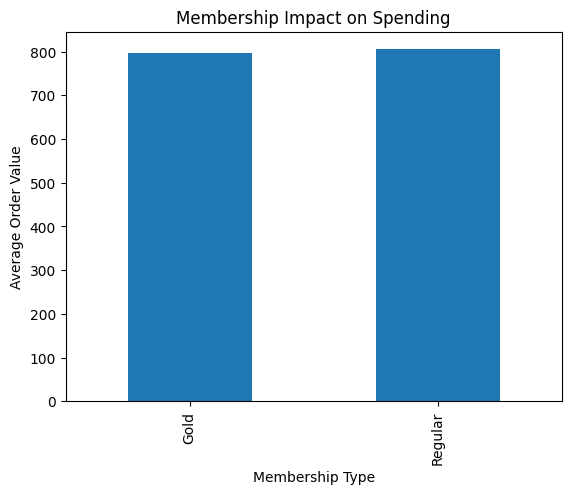

In [95]:
membership_revenue = df.groupby('membership')['total_amount'].mean()
print("Membership Impact On Revenue")
print(membership_revenue)

plt.figure()
membership_revenue.plot(kind='bar')
plt.xlabel("Membership Type")
plt.ylabel("Average Order Value")
plt.title("Membership Impact on Spending")
plt.show()

### 6. Monthly Revenue Seasonality

In [81]:
df['month'] = df['order_date'].dt.month

Monthly Revenue
month
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64


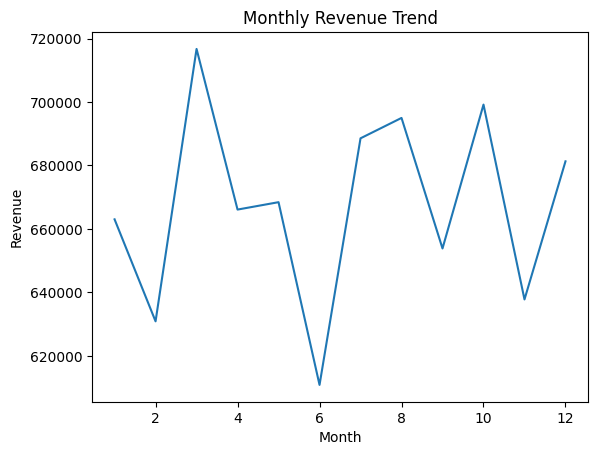

In [84]:
monthly_revenue = df.groupby('month')['total_amount'].sum()
print("Monthly Revenue")
print(monthly_revenue)

plt.figure()
plt.plot(monthly_revenue)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.show()